# 텍스트 마이닝_3  
* 참조 : 잡아라! 텍스트마이닝 with 파이썬

# 1. 빈도 분석

In [1]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

* 트럼프 대통령 취임 연설문

In [2]:
f = open('트럼프취임연설문.txt', 'r')
lines = f.readline()
f.close()
lines[0:100]

' Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow'

In [3]:
tokenizer = RegexpTokenizer('[\w]+')

stop_words = stopwords.words('english')
words = lines.lower()
tokens = tokenizer.tokenize(words)
stopped_tokens = [i for i in list((tokens)) if not i in stop_words]
stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]

pd.Series(stopped_tokens2).value_counts().head(10)

america     20
american    11
people      10
country      9
one          8
every        7
nation       7
world        6
great        6
new          6
dtype: int64

* 문재인 대통령 취임 연설문

In [4]:
import pandas as pd
from konlpy.tag import Hannanum

hannanum = Hannanum()

In [5]:
f = open('문재인대통령취임연설문.txt','r')
lines=f.readlines()
f.close()

In [6]:
temp = []
for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))

In [7]:
def flatten(l):
    flatList =[]
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list = flatten(temp)
word_list = pd.Series([x for x in word_list if len(x)>1])
word_list.value_counts().head(10)

대통령     29
국민      19
대한민국     9
우리       8
여러분      7
국민들      6
역사       6
나라       6
세상       5
대통령의     5
dtype: int64

* wordcloud

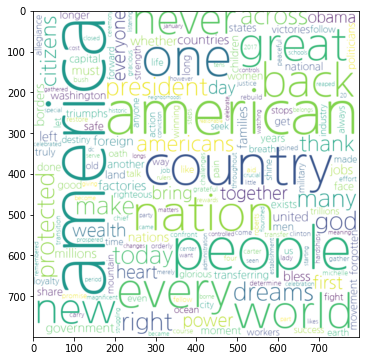

In [8]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

font_path = 'C:/Windows/Fonts/NanumGothicLight.ttf'

wordcloud = WordCloud(font_path = font_path,
                     width = 800,
                     height = 800,
                     background_color = 'white')

count = Counter(stopped_tokens2)
wordcloud = wordcloud.generate_from_frequencies(count)

def __array__(self):
    return self.to_array()

def to_array(self):
    return np.array(self.to_image())

array = wordcloud.to_array()

fig = plt.figure(figsize=(6,6))
plt.imshow(array, interpolation='bilinear')
plt.show()
fig.savefig('wordcloud.png')

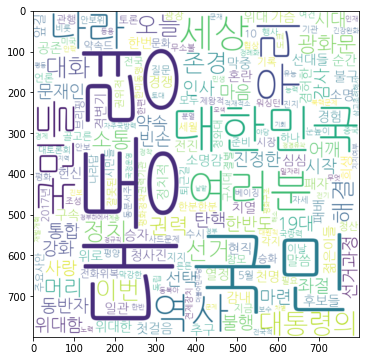

In [9]:
count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)

array = wordcloud.to_array()

fig = plt.figure(figsize=(6,6))
plt.imshow(array, interpolation='bilinear')
plt.show()
fig.savefig('wordcloud.png')

# 2. 군집분석

## K-means clustering

In [10]:
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

hannanum = Hannanum()

In [11]:
Data = pd.read_csv('군집분석데이터.csv', engine='python')
Data.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [12]:
docs = []
for i in Data['기사내용']:
    docs.append(hannanum.nouns(i))
    
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])
    
vec = CountVectorizer()
X = vec.fit_transform(docs)

df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

kmeans = KMeans(n_clusters=3).fit(df)
kmeans.labels_

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1',
                                                             'principal component 2'])
principalDf.index = Data['검색어']

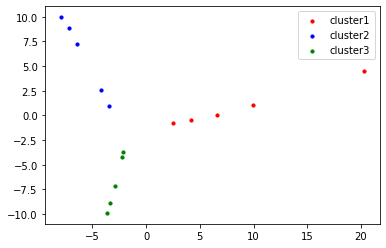

In [14]:
plt.scatter(principalDf.iloc[kmeans.labels_ == 0, 0], principalDf.iloc[kmeans.labels_==0, 1],
          s=10, c='red', label='cluster1')
plt.scatter(principalDf.iloc[kmeans.labels_ == 1, 0], principalDf.iloc[kmeans.labels_==1, 1],
          s=10, c='blue', label='cluster2')
plt.scatter(principalDf.iloc[kmeans.labels_ == 2, 0], principalDf.iloc[kmeans.labels_==2, 1],
          s=10, c='green', label='cluster3')
plt.legend()

## K-medoids Clustering

In [15]:
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from pyclustering.cluster import kmedoids
import numpy as np

hannanum = Hannanum()

In [16]:
Data = pd.read_csv('군집분석데이터.csv', engine='python')
Data.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [17]:
docs=[]
for i in Data['기사내용']:
    docs.append(hannanum.nouns(i))

for i in  range(len(docs)):
    docs[i] = ' '.join(docs[i])
    
vec = CountVectorizer()
X = vec.fit_transform(docs)

kmedoids_instance = kmedoids.kmedoids(df.values, initial_index_medoids = np.random.randint(15, size=3))
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()
clusters

[[7, 8, 9], [10], [0, 1, 2, 3, 4, 5, 6, 11, 12, 13, 14]]

## 계층적 군집분석

In [18]:
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

hannanum = Hannanum()

In [19]:
Data = pd.read_csv('군집분석데이터.csv', engine='python')
Data.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [20]:
docs=[]
for i in Data['기사내용']:
    docs.append(hannanum.nouns(i))
    
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])
    
vec = CountVectorizer()
X = vec.fit_transform(docs)

df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit_predict(df)

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

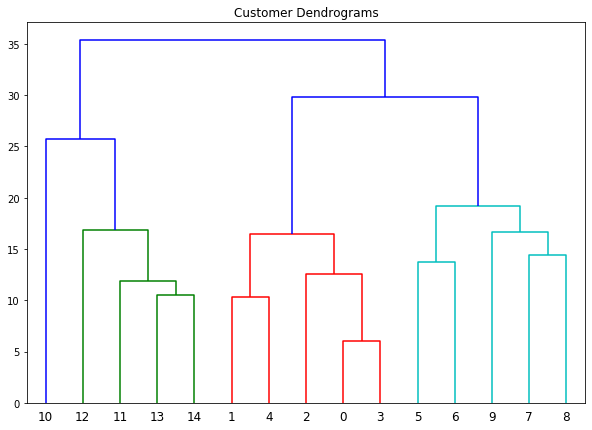

In [21]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

# 3. 토픽 모델링

## LDA(Latent Dirichlet Allocation)
* 단어의 교환성(단어들의 순서는 상관하지 않고 오로지 단어들의 유무만이 중요하다) 가정
* 단어의 순서를 무시할 경우 문서는 단훈히 그 안에 포함하는 단어들의 빈도수만을 가지고 표현할 수 있음
* 이 가정을 기반으로 단어와 문서들의 교환성을 포함하는 혼합 모형을 제시

In [22]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.tokenize import RegexpTokenizer

In [23]:
tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
p_stemmer = PorterStemmer()

In [24]:
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."
doc_f = "Big data is a term used to refer to data sets that are too large or complex for traditional data-processing application software to adequately deal with."
doc_g = "Data with many cases offer greater statistical power, while data with higher complexity may lead to a higher false discovery rate"
doc_h = "Big data was originally associated with three key concepts: volume, variety, and velocity."
doc_i = "A 2016 definition states that 'Big data represents the information assets characterized by such a high volume, velocity and variety to require specific technology and analytical methods for its transformation into value'."
doc_j = "Data must be processed with advanced tools to reveal meaningful information."

In [25]:
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e, doc_f, doc_g, doc_h, doc_i, doc_j]
texts = []
for w in doc_set:
    raw = w.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stop_words]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary)
ldamodel.print_topics(num_words=5)

[(0,
  '0.055*"health" + 0.036*"data" + 0.032*"may" + 0.025*"higher" + 0.023*"brocolli"'),
 (1,
  '0.057*"data" + 0.031*"big" + 0.023*"drive" + 0.023*"pressur" + 0.022*"brother"'),
 (2,
  '0.042*"data" + 0.029*"brocolli" + 0.029*"good" + 0.029*"mother" + 0.028*"eat"')]

In [26]:
ldamodel.get_document_topics(corpus)[0]

[(0, 0.035014924), (1, 0.03417774), (2, 0.9308073)]

### LDA 토픽 개수 지정
* Perplexity : 혼란도(작으면 작을 수록 해당 토픽 모델은 실제 문헌 결과를 잘 반영한다는 뜻)
* Topic Coherence : 평가 척도(상위 단어 간의 유사도롤 계산하여 평균을 구하면 실제로 해당 주제가 의미론적으로 일치하는    
                    단어들끼리 모여있는지 알 수 있음)

In [27]:
from gensim.models import CoherenceModel

print('\nPerplexity : ', ldamodel.log_perplexity(corpus))

coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, topn=10)
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score : ', coherence_lda)


Perplexity :  -5.035579709657307

Coherence Score :  0.39559301906450567


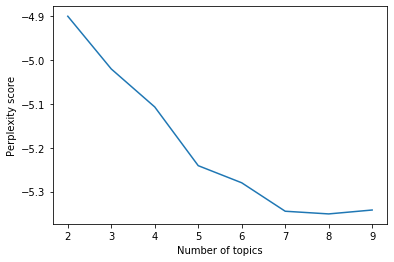

In [28]:
perplexity_values = []
for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))
    
x = range(2,10)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

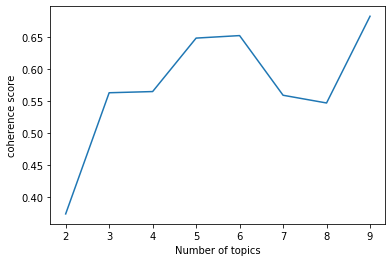

In [29]:
coherence_values = []
for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.show()

# 4. 감성분석
## 사전기반 감성분석
* AFINN : 2477개의 감성어들이 영어 사용자의 판단을 근거로 부정적, 긍적적 감성 점수가 부여
* EmoLex : 긍정, 부정 이외에 분노, 공포, 기대, 신뢰, 놀람, 슬픔, 기쁨, 역겨움과같은 8가지 감정으러도 나누어 줌
* Bing Liu lexicon : 긍정, 부정으로만 분류
* SentiWordNet : 긍정, 부정, 중립으로 단어 분류(nltk 패키지에서 사용가능)
* 한글 KOSAC(http://word.snu.ac.kr/kosac/index.php) 개발자 동의 필요

### IMDB 영화 리뷰 감성 분석

In [30]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
pos_review = (glob.glob('./데이터/aclImdb/train/pos/*.txt'))[20]

f = open(pos_review, 'r')
lines1 = f.readlines()[0]
f.close()

afinn = Afinn()
afinn.score(lines1)

8.0

In [32]:
neg_review = (glob.glob('G:/Python_Project/강좌/잡아라 텍스트마이닝 with 파이썬/데이터/aclImdb/train/neg/*.txt'))[20]

f = open(neg_review, 'r')
lines2 = f.readlines()[0]
f.close()

afinn.score(lines2)

-4.0

In [33]:
NRC = pd.read_csv('G:/Python_Project/강좌/잡아라 텍스트마이닝 with 파이썬/데이터/nrc.txt', engine='python',
                 header=None, sep='\t')

NRC = NRC[(NRC != 0).all(1)]
NRC = NRC.reset_index(drop=True)

tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
p_stemmer = PorterStemmer()

# 긍정 텍스트
raw = lines1.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words]

match_words = [x for x in stopped_tokens if x in list(NRC[0])]

emotion = []
for i in match_words:
    temp = list(NRC.iloc[np.where(NRC[0] == i)[0], 1])
    for j in temp:
        emotion.append(j)
        
sentiment_result1 = pd.Series(emotion).value_counts()
sentiment_result1

positive        8
trust           7
negative        5
anticipation    4
joy             4
sadness         3
fear            3
surprise        2
anger           2
dtype: int64

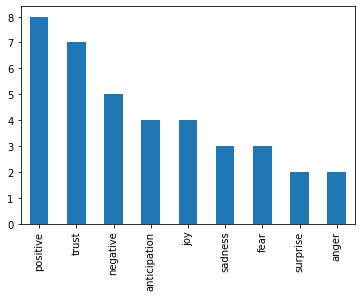

In [34]:
sentiment_result1.plot.bar()

In [35]:
# 부정 텍스트
raw = lines2.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words]

match_words = [x for x in stopped_tokens if x in list(NRC[0])]

emotion = []
for i in match_words:
    temp = list(NRC.iloc[np.where(NRC[0] == i)[0], 1])
    for j in temp:
        emotion.append(j)
        
sentiment_result2 = pd.Series(emotion).value_counts()
sentiment_result2

negative    2
disgust     2
sadness     1
positive    1
fear        1
anger       1
dtype: int64

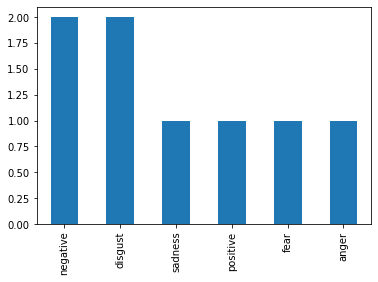

In [36]:
sentiment_result2.plot.bar()

## 기계학습기반 감성 분석

In [37]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
pos_review = (glob.glob('./데이터/aclImdb/train/pos/*.txt'))
lines_pos = []
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue

neg_review = (glob.glob('./데이터/aclImdb/train/neg/*.txt'))
lines_neg = []
for i in neg_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_neg.append(temp)
        f.close()
    except Exception as e:
        continue
        
total_text = lines_pos + lines_neg

x = np.array(['pos', 'neg'])
class_Index = np.repeat(x, [len(lines_pos), len(lines_neg)], axis=0)

stop_words = stopwords.words('english')
vect =  TfidfVectorizer(stop_words=stop_words).fit(total_text)

X_train_vectorized = vect.transform(total_text)

In [39]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

model = LogisticRegression()
model.fit(X_train_vectorized, class_Index)

pos_review_test = (glob.glob('./데이터/aclImdb/test/pos/*.txt'))[10]
test = []
f = open(pos_review_test, 'r')
test.append(f.readlines()[0])
f.close()

predictions = model.predict(vect.transform(test))
print(predictions)

neg_review_test = (glob.glob('./데이터/aclImdb/test/neg/*.txt'))[10]
test2 = []
f = open(neg_review_test, 'r')
test2.append(f.readlines()[0])
f.close()

predictions = model.predict(vect.transform(test2))
print(predictions)

['pos']
['neg']


In [40]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train_vectorized, class_Index)

predictions = clf.predict(vect.transform(test))
print(predictions)

predictions = clf.predict(vect.transform(test2))
print(predictions)

['pos']
['neg']


# 5. 연관어 분석

## 동시 출현 기반 연관어 분석
* 대상어와 다른 단어들이 같은 문맥 내에서 동시에 출현한 횟수를 세는 방법
* 동시출현 빈도의 횟수가 높을 수록 대상어와의 연관성이 높다는 가정하에    
  일정한 임계값 이상의 동시 출현 횟수가 넘는 대상어와 단어 간의 페어만을 남기고   
  나머지 페어들을 필터링

In [41]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
pos_review = (glob.glob('./데이터/aclImdb/train/pos/*.txt'))[0:100]
lines_pos = []
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue
        
print(len(lines_pos))

tokenizer = RegexpTokenizer('[\w]+')

stop_words = stopwords.words('english')

count = {} # 동시출현 빈도 저장
for line in lines_pos:
    words = line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if not i in stop_words + ['br']]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a > b:
                count[b, a] = count.get((b, a), 0) + 1
            else:
                count[a, b] = count.get((a, b), 0) + 1
                
df = pd.DataFrame.from_dict(count, orient='index')

list1 = []
for i in range(len(df)):
    list1.append([df.index[i][0], df.index[i][1], df[0][i]])
    
df2 = pd.DataFrame(list1, columns=['term1','term2','freq'])
df3 = df2.sort_values(by=['freq'], ascending=False)
df3 = df3.reset_index(drop=True)
df3.head(20)

100


,term1,term2,freq
0,movie,one,41
1,film,story,41
2,film,movie,35
3,movie,story,35
4,one,story,33
5,good,movie,32
6,film,one,31
7,movie,see,30
8,film,like,27
9,one,see,27


In [43]:
neg_review = (glob.glob('./데이터/aclImdb/train/neg/*.txt'))[0:100]
lines_neg = []
for i in neg_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_neg.append(temp)
        f.close()
    except Exception as e:
        continue
        
print(len(lines_neg))

tokenizer = RegexpTokenizer('[\w]+')

stop_words = stopwords.words('english')

count = {} # 동시출현 빈도 저장
for line in lines_neg:
    words = line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if not i in stop_words + ['br']]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a > b:
                count[b, a] = count.get((b, a), 0) + 1
            else:
                count[a, b] = count.get((a, b), 0) + 1
                
df = pd.DataFrame.from_dict(count, orient='index')

list1 = []
for i in range(len(df)):
    list1.append([df.index[i][0], df.index[i][1], df[0][i]])
    
df2 = pd.DataFrame(list1, columns=['term1','term2','freq'])
df3 = df2.sort_values(by=['freq'], ascending=False)
df3 = df3.reset_index(drop=True)
df3.head(20)

100


,term1,term2,freq
0,film,movie,42
1,like,movie,40
2,movie,one,38
3,film,one,35
4,like,one,33
5,good,movie,32
6,even,movie,32
7,even,like,31
8,good,one,30
9,film,like,29


## 통계가중치 기반 연관어 분석
* 코사인 유사도 이용

In [44]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

In [45]:
pos_review = (glob.glob('./데이터/aclImdb/train/pos/*.txt'))[0:100]
lines_pos = []
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue
        
stop_words = stopwords.words('english')
vec = TfidfVectorizer(stop_words=stop_words)
vector_lines_pos = vec.fit_transform(lines_pos)

A = vector_lines_pos.toarray()
print(A.shape)

A = A.transpose()
print(A.shape)

A_sparse = sparse.csr_matrix(A)
similarities_sparse = cosine_similarity(A_sparse, dense_output=False)
print(list(similarities_sparse.todok().items())[35000:35010])

print(vec.get_feature_names()[100:105])

print(vec.get_feature_names()[1469])

print(vec.get_feature_names()[108])

df = pd.DataFrame(list(similarities_sparse.todok().items()), columns=['words','weight'])

df2 = df.sort_values(by=['weight'], ascending=False)
df2 = df2.reset_index(drop=True)

df3 = df2.loc[np.round(df2['weight']) < 1]
df3 = df3.reset_index(drop=True)
df3.head(10)

(100, 4001)
(4001, 100)
[((1469, 108), 0.37803585968894865), ((1470, 108), 0.2189685434746738), ((1476, 108), 0.06407477897013734), ((1477, 108), 0.185189577514238), ((1480, 108), 0.20111036876169444), ((1489, 108), 0.06995711757772019), ((1496, 108), 0.10714874067068783), ((1503, 108), 0.30487333830091773), ((1504, 108), 0.30487333830091773), ((1512, 108), 0.30487333830091773)]
['acted', 'acting', 'action', 'actions', 'actor']
fraud
actual


,words,weight
0,"(3971, 3372)",0.499961
1,"(3372, 3971)",0.499961
2,"(1192, 2554)",0.499958
3,"(2554, 1192)",0.499958
4,"(2468, 1321)",0.499957
5,"(2468, 710)",0.499957
6,"(710, 2468)",0.499957
7,"(1321, 2468)",0.499957
8,"(2146, 889)",0.499909
9,"(889, 2146)",0.499909


## word2vec 기반 연관어 분석

In [46]:
import pandas as pd
import glob
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
import numpy as np
from nltk.tokenize import RegexpTokenizer
from gensim.models.word2vec import Word2Vec

In [47]:
pos_review=(glob.glob("./데이터/aclImdb/train/pos/*.txt"))[0:100]

lines_pos=[]
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue

stop_words = stopwords.words('english')

tokenizer = RegexpTokenizer('[\w]+')

text=[]
for line in lines_pos:
    words =  line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if not i in stop_words+["br"]]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    text.append(stopped_tokens2)

model = Word2Vec(text, sg=1, window=2, min_count=3)


model.init_sims(replace=True)


print(model.wv.similarity('film', 'movie'))

print(model.wv.most_similar("good",topn =5))

print(len(model.wv.index2word))

print(model.wv.index2word[0:5])


0.8582805
[('one', 0.8154987692832947), ('film', 0.7773120999336243), ('story', 0.7754970788955688), ('young', 0.7695387601852417), ('movie', 0.7630195021629333)]
895
['movie', 'film', 'one', 'story', 'see']


## 중심성 계수
* 연결 중심성(degree centrality)
* 근접 중심성(closeness centrality)
* 매개 중심성(betweenness centrality)
* 고유벡터 중심성(eigenvector centrality)

In [48]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
pos_review=(glob.glob("./데이터/aclImdb/train/pos/*.txt"))[0:100]

lines_pos=[]
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue

tokenizer = RegexpTokenizer('[\w]+')

stop_words = stopwords.words('english')

count = {}   #동시출현 빈도가 저장될 dict
for line in lines_pos:
    words =  line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if not i in stop_words+["br"]]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a>b: 
                count[b, a] = count.get((b, a),0) + 1  
            else :
                count[a, b] = count.get((a, b),0) + 1  

df=pd.DataFrame.from_dict(count, orient='index')

list1=[]
for i in range(len(df)):
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

df3=df2.sort_values(by=['freq'],ascending=False)

df3_pos=df3.reset_index(drop=True)


neg_review = (glob.glob('./데이터/aclImdb/train/neg/*.txt'))[0:100]

lines_neg=[]
for i in neg_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_neg.append(temp)
        f.close()
    except Exception as e:
        continue

count = {}   #동시출현 빈도가 저장될 dict
for line in lines_neg:
    words =  line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if not i in stop_words+["br"]]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a>b: 
                count[b, a] = count.get((b, a),0) + 1  
            else :
                count[a, b] = count.get((a, b),0) + 1 

df=pd.DataFrame.from_dict(count, orient='index')

list1=[]
for i in range(len(df)):
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

df3=df2.sort_values(by=['freq'],ascending=False)

df3_neg=df3.reset_index(drop=True)

In [50]:
import networkx as nx
import operator

G_pos=nx.Graph()

# 'freq'의 수치가 10보다 큰 단어들만 중심성 계수 산출함 1부터할 경우 계산이 많아짐 -> 임계값 이상의 빈도로 계산 추천
for i in range((len(np.where(df3_pos['freq']>10)[0]))):
    G_pos.add_edge(df3_pos['term1'][i], df3_pos['term2'][i], weight=int(df3_pos['freq'][i]))

dgr = nx.degree_centrality(G_pos)
btw = nx.betweenness_centrality(G_pos)
cls = nx.closeness_centrality(G_pos)
egv = nx.eigenvector_centrality(G_pos)

sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)

print("** degree **")
for x in range(10):
    print(sorted_dgr[x])

print("** betweenness **")
for x in range(10):
    print(sorted_btw[x])

print("** closeness **")
for x in range(10):
    print(sorted_cls[x])

print("** eigenvector **")
for x in range(10):
    print(sorted_egv[x])

** degree **
('movie', 0.8131868131868133)
('film', 0.7802197802197803)
('one', 0.6593406593406594)
('story', 0.6153846153846154)
('like', 0.38461538461538464)
('see', 0.37362637362637363)
('time', 0.3296703296703297)
('well', 0.28571428571428575)
('good', 0.2527472527472528)
('much', 0.2417582417582418)
** betweenness **
('movie', 0.34024766442348864)
('film', 0.2953840095598338)
('one', 0.15119074250942383)
('story', 0.11283095414963537)
('titanic', 0.022950792932477912)
('williams', 0.021978021978021976)
('jack', 0.021978021978021976)
('like', 0.020412265119224827)
('see', 0.015291657196419105)
('dicaprio', 0.008931398949713967)
** closeness **
('movie', 0.8425925925925926)
('film', 0.8053097345132744)
('one', 0.7398373983739838)
('story', 0.7165354330708661)
('like', 0.610738255033557)
('see', 0.6026490066225165)
('time', 0.5909090909090909)
('well', 0.5723270440251572)
('good', 0.5652173913043478)
('much', 0.5617283950617284)
** eigenvector **
('movie', 0.30833286635908264)
('film

In [51]:
G_neg=nx.Graph()

for i in range((len(np.where(df3_neg['freq']>10)[0]))):
    G_neg.add_edge(df3_neg['term1'][i], df3_neg['term2'][i], weight=int(df3_neg['freq'][i]))

dgr = nx.degree_centrality(G_neg)
btw = nx.betweenness_centrality(G_neg)
cls = nx.closeness_centrality(G_neg)
egv = nx.eigenvector_centrality(G_neg)

sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)

print("** degree **")
for x in range(10):
    print(sorted_dgr[x])

print("** betweenness **")
for x in range(10):
    print(sorted_btw[x])

print("** closeness **")
for x in range(10):
    print(sorted_cls[x])
    
print("** eigenvector **")
for x in range(10):
    print(sorted_egv[x])

** degree **
('movie', 0.8131868131868133)
('like', 0.7362637362637363)
('one', 0.6593406593406594)
('film', 0.6373626373626374)
('even', 0.5164835164835165)
('good', 0.4285714285714286)
('would', 0.37362637362637363)
('story', 0.3626373626373627)
('much', 0.3076923076923077)
('really', 0.28571428571428575)
** betweenness **
('movie', 0.30830485090586396)
('like', 0.21616648944282554)
('film', 0.15728284389301903)
('one', 0.14797721518590118)
('even', 0.053827690763103654)
('good', 0.02303288989065687)
('story', 0.01925692884541145)
('would', 0.01723670985338729)
('much', 0.00823325266314502)
('kareena', 0.005149150116186804)
** closeness **
('movie', 0.8425925925925926)
('like', 0.7913043478260869)
('one', 0.7459016393442623)
('film', 0.7338709677419355)
('even', 0.674074074074074)
('good', 0.6363636363636364)
('would', 0.6148648648648649)
('story', 0.610738255033557)
('much', 0.5909090909090909)
('really', 0.5833333333333334)
** eigenvector **
('movie', 0.28210644395390705)
('like', 

## 연관어 네트워크 시각화

In [2]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pos_review=(glob.glob("./데이터/aclImdb/train/pos/*.txt"))[0:100]

lines_pos=[]
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue

tokenizer = RegexpTokenizer('[\w]+')

stop_words = stopwords.words('english')

count = {}   #동시출현 빈도가 저장될 dict
for line in lines_pos:
    words =  line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if not i in stop_words+["br"]]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a>b: 
                count[b, a] = count.get((b, a),0) + 1  
            else :
                count[a, b] = count.get((a, b),0) + 1     

df = pd.DataFrame.from_dict(count, orient='index')

list1=[]
for i in range(len(df)):
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

df2 = pd.DataFrame(list1, columns=["term1","term2","freq"])
df3 = df2.sort_values(by=['freq'],ascending=False)
df3_pos=df3.reset_index(drop=True)

### matplotlib

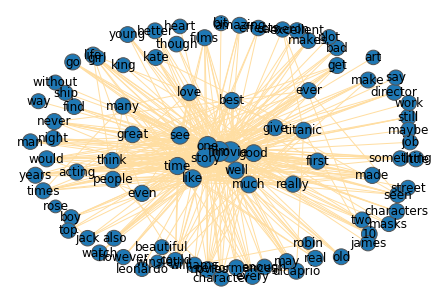

In [8]:
import networkx as nx
import operator

G_pos=nx.Graph()

for i in range((len(np.where(df3_pos['freq']>10)[0]))):
    G_pos.add_edge(df3_pos['term1'][i], df3_pos['term2'][i], weight=int(df3_pos['freq'][i]))

dgr = nx.degree_centrality(G_pos)
btw = nx.betweenness_centrality(G_pos)
cls = nx.closeness_centrality(G_pos)
egv = nx.eigenvector_centrality(G_pos)

sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)

G = nx.Graph()

for i in range(len(sorted_cls)):
    G.add_node(sorted_cls[i][0], nodesize=sorted_cls[i][1])

for i in range((len(np.where(df3_pos['freq']>10)[0]))):
    G.add_weighted_edges_from([(df3_pos['term1'][i], df3_pos['term2'][i],int(df3_pos['freq'][i]))])

sizes = [G.nodes[node]['nodesize']*500 for node in G]

options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

nx.draw(G, node_size=sizes, pos=nx.spring_layout(G, k=3.5, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()